In [1]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Dynamique de population et Génétique

*Sujet d'ARE Dynamic 2019*

# 1. Modèle de Galton-Watson 

[Francis Galton](https://fr.wikipedia.org/wiki/Francis_Galton) (1822-1911) est un scientifique anglais touche-à-tout, ayant des contributions de l'anthropologie à la psychologie en passant par les statistiques. Il consacre une part importante de ses recherches à défendre la théorie de l'évolution de son cousin, Charles Darwin. Il est considéré comme l'un des fondateurs de la biométrie, il découvre l'identification par empreintes digitales, cependant il est aussi l'un des fondateurs de l'[eugénisme](https://fr.wikipedia.org/wiki/Eug%C3%A9nisme) et soutient des politiques publiques peu glorieuses. 

Au cours du XIXème siècle il s'intéresse à la disparition des patronymes. Pour ce faire, il introduit le [modèle de Galton-Watson](https://fr.wikipedia.org/wiki/Processus_de_Galton-Watson) permettant de modéliser la dynamique d'une population. Introduit une première fois en 1845 par [Irénée-Jules Bienaymé](https://fr.wikipedia.org/wiki/Ir%C3%A9n%C3%A9e-Jules_Bienaym%C3%A9).

### Comment modéliser un tel phénomène ?

Considérons un ensemble d'**individus** formant une **population**. Par soucis de simplicité nous faisons abstraction des modalités de reproduction, couple, genre, etc...  
Chaque individu de la population est modélisé par une **variable** $X$ représentant sa capacité de reproduction, c'est-à-dire son nombre de descendants.  
Chaque individu de la population peut avoir $k$ descendants avec probabilité $p_k$ : $\mathbb{P}(X = k) = p_k$ avec $\sum_k p_k =1$.  

Commençons par modéliser un individu : la variable $X$.

In [2]:
# Dictionnaire représentant la distribution de probabilité des descendants.
# clef = nombre de descendants et valeur = probabilité
p = {0 : 0.5,
     1 : 0.2,
     2 : 0.2,
     3 : 0.1}

# Let's assert that this is a probalitiy distribution:
#np.testing.assert_almost_equal(sum(p.values()),1)

In [3]:
def number_of_descendants(p):
    '''
    dict[int:float]->int
    Étant donnée une distibution de probabilité 'p', la fonction retourne le nombre de descendants d'un individu.
    '''
    u = np.random.random()
    s = 0
    for k in p.keys():
        s += p[k]
        if u < s:
            return k

**Question 1.1 :** Remplacer la distribution $p$ par une distribution qui vous semble cohérente, puis tester cette fonction. (Par exemple, vous pourrez tirer un certain nombre de fois un nombre de descendants selon cette fonction, puis vérifier que la distribution observée est conforme.)

In [4]:
number_of_descendants({0:0.2,1:0.3,2:0.3,3:0.2})

2

Modélisons maintenant cette population et son évolution au fil des générations.  
Soit $Z_n$ la population de la n-ème génération. $Z_{n+1} = \sum_{i=1}^{Z_n}X$.

In [5]:

def update_population(Z,p):
    '''
    int*dict[int:float]->int
    Étant donnés un nombre d'individus 'C' et une distibution de probabilité de descendants 'p',
    la fonction retourne le nombre d'individus à la prochaine génération.
    '''
    Z_new = 0
    for k in range(Z):
        #sum up all the descendants over all the population Z
        Z_new += number_of_descendants(p)
    return Z_new


**Question 1.2 :** Compléter la fonction "population_n_generations" ci-dessous qui, étant donné un nombre d'invidus de départ $Z_0$, une distribution de probabilité de descendants $p$ et un nombre de générations $n$, retourne une liste $L$ telle que $L[i]$ soit le nombre d'individus à la génération $i$ pour $i$ de $0$ à $n-1$.

In [6]:

def population_n_generations(Z0,p,n):
    """
     int*dict[int:float]*int->list[int]
     ...
    """
    L=[Z0]
    
    for i in range(n):
        L.append(update_population(L[i-1],p))
        
        
    return L

#test pour 10 générations, population initiale 20 individus
Z0 = 20
n = 10
print(population_n_generations(Z0,p,n))

[20, 21, 19, 16, 20, 10, 13, 14, 19, 22, 8]











À présent, visualisons l'évolution de cette population. Vous pouvez changer $n$, $Z_0$ et $p$.

[1000, 894, 919, 845, 822, 812, 726, 721, 660, 676, 601, 609, 525, 530, 475, 470, 451, 392, 424, 353, 386, 327, 311, 286, 296, 260, 273, 255, 267, 235, 228, 217, 189, 190, 171, 171, 159, 141, 147, 127, 134, 112, 123, 89, 115, 73, 96, 56, 100, 52, 79]


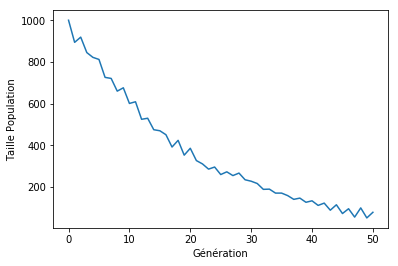

In [7]:
n = 50
Z0 = 1000
p = {0 : 0.3,
     1 : 0.5,
     2 : 0.2,
     3 : 0.1}
#np.testing.assert_almost_equal(sum(p.values()),1)

def plot_population(L):
    '''
    ??-> None
    Visualise the evolution of the population in 'L'
    '''
    plt.figure()
    plt.plot(L)
    plt.ylabel("Taille Population")
    plt.xlabel("Génération")
    plt.show()
    return

    
L=population_n_generations(Z0,p,n)
print(L)
plot_population(L)

**Question 1.3** : Pour la capacité de reproduction $p$ donnée en exemple, observez-vous toujours une extinction de la population ?  Si c'est le cas, déterminez combien de générations sont nécessaires *en moyenne* avant que la population ne s'éteigne ?

On observe toujours une extinction de population, plus Z0 est grand plus elle se produit loin dans les générations. 

On appelle espérance d'une variable discrète $X$ : $\mathbb{E}[X] = \sum_k p_kk$

**Question 1.4**: Compléter la fonction "esperance" ci-dessous permettant de calculer l'espérance d'une variable discrète $X$.

In [8]:
def esperance(p):
    """
    dict[int:float]->float
    ...
    """
    e=0
    for k in p:
        e += p[k] * k
    
    return e

esperance(p)

1.2000000000000002

 **Question 1.5**: Prenez à présent une capacité de reproduction dont l'espérance est 1.5 (testez que c'est bien le cas à l'aide de votre fonction précédente), et reproduisez l'expérience de la question 1.3. 

On prend p = {0 : 0.1, 1 : 0.3, 2 : 0.3 , 3 : 0.2 }
En reproduisant l'experience de la question 1.3, on observe que la population ne s'éteint jamais si la population de départ est suffisament grande car l'esperence est supérieur à 1.

**Question 1.6** : Jouer sur le paramètre $e = \mathbb{E}[X]$ et déterminer une valeure qui semble jouer un rôle critique dans le fait que la population va s'éteindre ou pas.

Si l'esperence est inférieur à 1 la population aura plus tendance à s'éteindre alors que si l'esperence est supérieur à 1 la population aura plus tendance à grandir.

**Question 1.7** : Que se passe-t-il lorsque $Z_0$ et $n$ sont grands ?

Lorsque Z0 et n sont grands plus la courbe respecte la loi de l'esperence

# 2. Island Model

Dans cette seconde partie, le but est d'analyser la répartition et la dissémination des allèles au sein d'une population, répartie dans différentes zones géographiques, tout en prenant en compte les migrations.  

**Rappel :** Un allèle est une version variable d'un même gène. En général, il existe deux allèles pour chaque gène. Par exemple : si nous possèdons l'allèle brun nous avons les cheveux bruns, si nous ne l'avons pas nous avons les cheveux blonds. (extrême simplification, ne pas répéter à un biologiste).

Imaginons trois iles distinctes $A$, $B$ et $C$, sur chaque île réside une population distincte. Dans chaque population nous constatons une proportion différente de personne possédant un certain allèle. La distribution de cet allèle est notée par : $p_i$ pour $i\in \{A,B,C\}$.


![Island Model](Island_Model.png "Island_Model")

Par exemple : $p_A$ représente le pourcentage de la population de l'ile $A$ ayant les cheveux bruns.  

**Hypothèse 1:** La population globale $Z$ est considérée comme fixe et équirépartie entre les trois îles, chaque île comporte donc $Z/3$ individus. 
La population étant considérée comme stable, chaque individu laisse place à un seul individu à la génération suivante. Dans un premier temps nous ignorons donc le renouvelement de la population.  

Nous observons une migration d'une **fraction** $m$ d'une île à une autre au fil des générations, celle-ci est cependant équilibrée, à double sens, le nombre d'invidus par île ne varie donc pas. Par exmple, pour $m=0.1$, à chaque génération $10\%$ de la population va migrer de chaque île vers les autres. Cette fraction ne peut donc pas excéder $0.5$ (dans ce cas la totalité de la population migre de chaque île). 

Dans cette partie, nous chercherons à répondre à la question suivante : Comment les migrations impactent la distribution d'un allèle au sein des 3 îles ?


Modélisons l'évolution de la proportion de la population possédant notre allèle (les cheveux bruns) au sein de chaque île. Notons par $p_{A,n}$ la distribution de notre allèle dans l'ile $A$ à la génération $n$.  

On a $p_{A,n+1} = \frac{p_{A,n}\frac{Z}{3}(1 - 2m) + p_{B,n}\frac{Z}{3}m + p_{C,n}\frac{Z}{3}m}{\frac{Z}{3}}$  

et donc $p_{A,n+1} = p_{A,n}(1 - 2m) + p_{B,n}m + p_{C,n}m$.

**Question 2.1 :** Expliquer cette formule. Quant est-il pour $p_{B,n+1}$ et $p_{C,n+1}$ ?

Cette formule correspond à la proportion de la population de l'île A possédant l'allèle après chaque migration, ainsi on multiplie la probabilité d'avoir l'allèle par le nombre de personnes de l'île pour connaitre le nombre de personnes qui possède l'allèle avant la migration. On soustrait ensuite les personnes ayant l'allèle qui migrent vers les autres îles et on ajoute les personnes ayant l'allèle qui arrivent sur l'île A depuis les deux autres îles. On divise par la population totale de l'ile et obtient alors la probabilité qu'une personne de l'ile A possède l'allèle apres la migration.

In [9]:
# Nous utiliserons les paramètres suivants.

m = 0.01 # coefficient de migration

p = {'A' : 0.1,
    'B' : 0.1,
    'C' : 0.8} # Initial probability to have brown hair



**Question 2.2 :** Corriger la fonction *update_genetics* ci-dessous qui prend en entrée un dictionaire $p$ (représentant la proportion d'individus ayant les cheveux bruns dans chacune des trois îles à un instant donné), une fraction de migration $m$ et retourne la proportion d'individus ayant les cheveux bruns dans chacune des trois îles à l'instant suivant sous la forme d'un dictionaire.

In [10]:
def update_genetics(p,m):
    '''
    dict[str:float]*float->dict[str:float]
    Update the population's genetics 
    '''
    p_new={}
    p_new['A'] = p['A']*(1-2*m)+p['B']*m+p['C']*m
    p_new['B'] = p['B']*(1-2*m)+p['A']*m+p['C']*m
    p_new['C'] = p['C']*(1-2*m)+p['B']*m+p['A']*m
    return p_new

**Question 2.3 :** Compléter la signature et la description de la fonction *genetics_n_migrations* suivante.

In [11]:
def genetics_n_migrations(p,m,n):
    '''
     dict[str:float]*float*int-> list[Number]

    '''
    keys=["A","B","C"] 
    M = []
    M.append([p[k] for k in keys])
    for i in range(1,n):
        p = update_genetics(p,m)
        M.append([p[k] for k in keys])
    return M

In [12]:
genetics_n_migrations(p,m,n)

[[0.1, 0.1, 0.8],
 [0.10700000000000001, 0.10700000000000001, 0.786],
 [0.11379000000000002, 0.11379000000000002, 0.77242],
 [0.1203763, 0.1203763, 0.7592474],
 [0.12676501099999998, 0.12676501099999998, 0.746469978],
 [0.13296206066999997, 0.13296206066999997, 0.7340758786599999],
 [0.13897319884989998, 0.13897319884989998, 0.7220536023002],
 [0.14480400288440298, 0.14480400288440298, 0.710391994231194],
 [0.15045988279787087, 0.15045988279787087, 0.6990802344042581],
 [0.15594608631393475, 0.15594608631393475, 0.6881078273721304],
 [0.1612677037245167, 0.1612677037245167, 0.6774645925509664],
 [0.1664296726127812, 0.1664296726127812, 0.6671406547744374],
 [0.17143678243439772, 0.17143678243439772, 0.6571264351312042],
 [0.17629367896136577, 0.17629367896136577, 0.647412642077268],
 [0.1810048685925248, 0.1810048685925248, 0.6379902628149501],
 [0.18557472253474902, 0.18557472253474902, 0.6288505549305016],
 [0.19000748085870653, 0.19000748085870653, 0.6199850382825866],
 [0.194307256

A présent visualisons la fréquence de l'allèle au cours du temps.

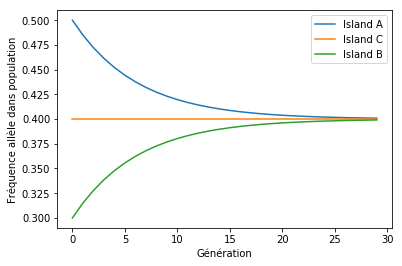

In [13]:
p = {'A' : 0.5,
    'B' : 0.4,
    'C' : 0.3}

m = 0.05 # Ratio of the population that migrate every generation

n = 30

M = genetics_n_migrations(p,m,n)

def plot_genetics(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island " +i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return 

plot_genetics(M,p)


**Questions 2.4:** Modifier $p_A,p_B,p_C$ ainsi que le taux de migration $m$ et décrire les différents phénomènes observés.

Plus le taux de migration m est élevé plus la proportion d'allèle dans chaque îles se stabilise vite au niveau de la moyenne des 3 probabilités. Cette dernière vaut toujours la moyenne des probabilités même si on change pA pB Pc car le nombre d'habitants dans chaque île ne change pas.

On peut complexifier la modélisation en faisant varier le nombre d'îles ou bien les taux de migrations entre îles : $m$ $\rightarrow$ $m_{A,B}, m_{B,C}, m_{C,A}$.

### Variante  1 : Nombre d'îles variable :

**Question 2.5 (facultatif) :** Adapter les fonctions précédentes pour un nombre d'îles arbitraire. 

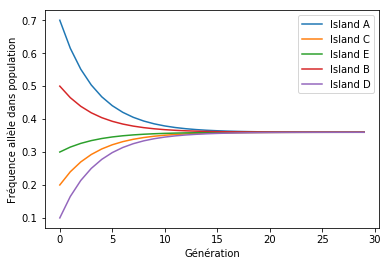

In [14]:
p = {'A' : 0.7,
    'B' : 0.2,
    'C' : 0.3,
    'D' : 0.5,
    'E' : 0.1}

nb=5

m = 0.05 # Ratio of the population that migrate every generation

n = 30


def update_genetics_2(p,m,nb):
    '''
    dict[str:float]*float->dict[str:float]
    Update the population's genetics 
    '''
    p_new={}
    for i in p:
        p_new[i]=p[i]*(1-(nb-1)*m)-p[i]*m
        for j in p:
            p_new[i] += p[j]*m
    return p_new


def genetics_n_migrations_2(p,m,n):
    '''
     dict[str:float]*float*int-> list[Number]

    '''
    keys=['A','B','C','D','E'] 
    M = []
    M.append([p[k] for k in keys])
    for i in range(1,n):
        p = update_genetics_2(p,m,nb)
        M.append([p[k] for k in keys])
    return M


M = genetics_n_migrations_2(p,m,n)

def plot_genetics_2(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island " +i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return 

plot_genetics_2(M,p)

### Variante 2 : Taux de migrations différents entre îles  :

Considérons tout d'abord : $m_{A,B} = m_{B,A}$, $m_{A,C} = m_{C,A}$ et $m_{C,B} = m_{B,C}$.

**Question 2.6 :** Retrouver la formule suivante et adapter les fonctions précédentes. $p_{A,n+1} = p_{A,n}(1-m_{A,B}-m_{C,A})+p_{B,n}m_{B,A}+p_{C,n}m_{C,A}$

In [15]:
#Nous utiliserons les paramètres suivants.

p = {'A' : 0.5,
    'B' : 0.4,
    'C' : 0.8} # Initial probability to have red hair 

m = {('A','B') : 0.2, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.2,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.1,
     ('C','B') : 0.1}

In [16]:
def generation_variante2(p,m):
    
    p_new={}
    p_new['A'] = p['A']*(1-m[('A','B')]-m[('A','C')])+p['B']*m[('B','A')]+p['C']*m[('C','A')]
    p_new['B'] = p['B']*(1-m[('B','A')]-m[('B','C')])+p['A']*m[('A','B')]+p['C']*m[('C','B')]
    p_new['C'] = p['C']*(1-m[('C','A')]-m[('C','B')])+p['B']*m[('B','C')]+p['A']*m[('A','C')]
    return p_new

generation_variante2(p,m)

{'A': 0.495, 'B': 0.46, 'C': 0.7450000000000001}

**Question 2.7**: Que se passe-t-il si le taux de migrations d'un île à une autre n'est plus symétrique : $m_{A,B} \neq m_{B,A}$ ? Est-ce que notre notre calcul est toujours correct ? (Indice : cf hypothèse 1.)

La population va alors diffèrer selon chaque île et donc notre calcul n'est plus correct puisque l'on ne prend pas en compte les population de chaque île

# 3. Galton-Watson et Migrations

Dans cette partie nous nous intéressons aux nombres d'individus sur chaque île sans tenir compte de leurs patrimoines génétiques. Nous supposons que la population de chaque île suit un modele de Gatson-Watson. Prenons en compte les migrations et adaptons notre modèle en conséquent.

Notons $Z_{A,n},Z_{B,n},Z_{C,n}$ les populations des îles $A$, $B$ et $C$ à la génération $n$. 

La formule suivante peut sembler compliquée, mais s'interprète assez facilement :
- $Z_{A,n+1} = \sum_{i=1}^{Z_{A,n}'}X$ où $Z_{A,n}' = Z_{A,n}(1-m_{A,B}-m_{A,C})+Z_{B,n}m_{B,A}+Z_{C,n}m_{C,A}$.

$Z_{A,n}'$ est la population de l'île $A$ à la generation $n$ **après** avoir pris en compte les migrations.

**Question 3.1 :** Retrouver les formules pour $Z_{B,n+1}$ ainsi que pour $Z_{C,n+1}$.

$Z_{B,n+1} = \sum_{i=1}^{Z_{B,n}'}X$ où $Z_{B,n}' = Z_{B,n}(1-m_{B,A}-m_{B,C})+Z_{A,n}m_{A,B}+Z_{C,n}m_{C,B}$

$Z_{C,n+1} = \sum_{i=1}^{Z_{C,n}'}X$ où $Z_{C,n}' = Z_{C,n}(1-m_{C,A}-m_{C,B})+Z_{A,n}m_{A,C}+Z_{B,n}m_{B,C}$                     

Modélisons l'évolution de cet archipel au fil des générations.

In [17]:
#Nous utiliserons les paramètres suivants.

p = {0 : 0.5,
     1 : 0.4,
     2 : 0.05,
     3 : 0.05} # Number of descendants
#np.testing.assert_almost_equal(sum(p.values()),1)

P = {'A' : p,
     'B' : p,
     'C' : p} # Galton Watson parameter on each island

Z0 = {'A' : 40,
     'B' : 1000,
     'C' : 400} #Initial Population

M = {('A','B') : 0.02, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.3,
     ('C','A') : 0.5,
     ('B','C') : 0.3,
     ('C','B') : 0.5}

n = 10 #Number of generations

**Question 3.2 :** Compléter la fonction ci-dessous.

In [18]:
def update_populations_with_migrations(Z,P,M):
    '''dict[str:int] * dict[str:dict[str:float]] * dict[str:float] -> dict[set:int]
    '''
    Z_new = {}
    Z_temp=generation_variante2(Z,M)
    for i in Z_temp:
        Z_new[i]=update_population(int(Z_temp[i]),P[i])
        
    
    return Z_new

update_populations_with_migrations(Z0,P,M)

{'A': 164, 'B': 577, 'C': 181}

**Question 3.3 :** Visualiser le nombre d'individu sur chaque île.

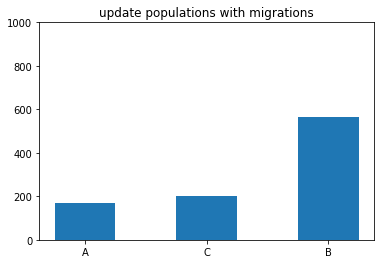

In [19]:
from pylab import *


D=update_populations_with_migrations(Z0,P,M)

# A histogram
fig, axes = plt.subplots()
#1, 2, figsize=(12,4)

axes.bar([i for i in D],[D[j] for j in D],width=0.5)
axes.set_title("update populations with migrations")
axes.set_ylim((0, 1000));

**Questions 3.4 :**
- Faire varier les populations initiales $Z_0$.
- Modifier les paramètres de migrations pour éteindre la population d'une seule île.
- Faire survivre la population d'une seule île.

### Visualisation Dynamique (Facultatif)

Avec cette visualisation il est très simple d'observer les phénomènes de cas (sur/sous)-critiques, en faisant varier ne serait-ce que très légérement l'espérance.

In [20]:
import pandas as pd
def animated_populations(Z,P,M,n):
    n_island = len(Z)
    pop_dict = {0:Z}
    for i in range(n):
        Z = update_populations_with_migrations(Z,P,M)
        pop_dict[i]=Z.copy()
    pop_df = pd.DataFrame.from_dict(pop_dict,orient='index')
    fig = plt.figure()
    cmap = plt.get_cmap('tab10')
    barplot = plt.bar(range(n_island),pop_df.max(),color=[cmap(i) for i in range(n_island)])
    def animate(i):
        populations = pop_df.iloc[i,:]
        for j,b in enumerate(barplot):
            b.set_height(populations[j])
    plt.tick_params(top=False,right=False)
    plt.xticks(range(n_island),["Island "+str(i) for i in Z.keys()])
    plt.ylabel("Population")
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    anim = animation.FuncAnimation(fig,animate,blit=False,frames = n,interval=300,repeat=False)
    anim.save('mymovie.mp4',writer=animation.FFMpegWriter(fps=10))
    return anim

<IPython.core.display.Javascript object>


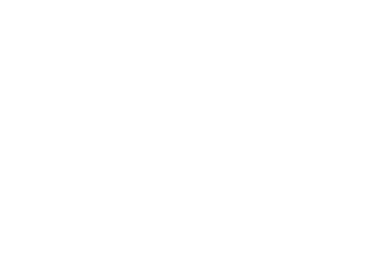

<IPython.core.display.Javascript object>


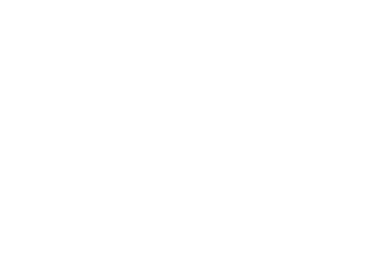

In [21]:
p = {0 : 0.4,
     1 : 0.3,
     2 : 0.2,
     3 : 0.1}
#np.testing.assert_almost_equal(sum(p.values()),1)
P = {'A' : p,
     'B' : p,
     'C' : p}
Z0 = {'A' : 400,
     'B' : 2000,
     'C' : 400}
M = {('A','B') : 0.05, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.05,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.01,
     ('C','B') : 0.01}
n = 400
%matplotlib notebook 
animated_populations(Z0,P,M,n)

# 4. Galton-Island

Retournons à notre Island Model, maintenant que nous avons pris en compte l'évolution de la population sur chaque île, celle-ci n'étant plus constante, nous allons pouvoir réaliser un modèle un peu plus réaliste, nous oublions l'**hypothèse 1**.

**Question 4.1 :** Retrouver la formule générale suivante :

$p_{A,n+1} = \frac{\displaystyle p_{A,n}Z_{A,n}(1-m_{A,B}-m_{A,C})+p_{B,n}Z_{B,n}m_{B,A}+p_{C,n}Z_{C,n}m_{C,n}}{\displaystyle Z_{A,n}(1-m_{A,B}-m_{A,C})+Z_{B,n}m_{B,A}+Z_{C,n}m_{C,n}}$


Adapter les fonctions précédentes dans les box ci dessous.

$p_{A,n+1} = \frac{p_{A,n}\frac{Z}{3}(1 - 2m) + p_{B,n}\frac{Z}{3}m + p_{C,n}\frac{Z}{3}m}{\frac{Z}{3}}$

on utilise cette formule en remplacant Z/3 par la population de chaque ile avant la migration et celui en bas par la population de l'île A après la migration pour obtenir la proportion de personnes avec l'allèle dans l'île A après la migration. 

In [22]:
def update_genetics_with_migrations(Z,p_genetics,m,verbose=False):
    '''
    Update the genetics of the population 'C', with parameter in 'p_galton' and 'p_genetics',
    according to migrations 'm' 
    '''
    D = dict()
    D["A"] = (p_genetics["A"]*Z["A"]*(1 - m[("A","B")] - m[("A","C")]) + p_genetics["B"]*Z["B"]*m[("B","A")] + p_genetics[("C")]*Z["C"]*m[("C","A")])/(Z["A"]*(1 - m[("A","B")] - m["A","C"]) + Z["B"]*m[("B","A")] + Z["C"]*m[("C","A")])
    D["B"] = (p_genetics["B"]*Z["B"]*(1 - m[("B","A")] - m[("B","C")]) + p_genetics["A"]*Z["A"]*m[("A","B")] + p_genetics[("C")]*Z["C"]*m[("C","B")])/(Z["B"]*(1 - m[("B","A")] - m["B","C"]) + Z["A"]*m[("A","B")] + Z["C"]*m[("C","B")])
    D["C"] = (p_genetics["C"]*Z["C"]*(1 - m[("C","B")] - m[("C","A")]) + p_genetics["A"]*Z["A"]*m[("A","C")] + p_genetics[("B")]*Z["B"]*m[("B","C")])/(Z["C"]*(1 - m[("C","A")] - m["C","B"]) + Z["B"]*m[("B","C")] + Z["A"]*m[("A","C")])

    
    return D
    
update_genetics_with_migrations(Z,p_genetics,m)



NameError: name 'Z' is not defined

In [ ]:
def galton_island(Z,p_galton,p_genetics,m,n):
    '''
    Combinaison des deux modèles 
    '''
    D = dict()
    Z_temp=Z
    temp = update_genetics_with_migrations(Z_temp,p_genetics,m)
    for j in range(n):
        for i in temp:
            D[i] = update_population(int(Z_temp[i] * temp[i]),p_galton[i])
            Z_temp[i] = update_population(Z_temp[i],p_galton[i])
        
    return D

In [ ]:
Z = {'A' : 500,
     'B' : 10000,
     'C' : 50} # Initial population
p = {0 : 0.3,
     1 : 0.4,
     2 : 0.2,
     3 : 0.1}
p_galton = {'A' : p,
            'B' : p,
            'C' : p}
p_genetics = {'A' : 0.1,
              'B' : 0.1,
              'C' : 0.1} # Initial proportion of the population that can survive the disease. 
m = {('A','B') : 0.02, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.01,
     ('C','A') : 0.2,
     ('B','C') : 0.01,
     ('C','B') : 0.1}
n = 20
galton_island(Z,p_galton,p_genetics,m,n)

**Questions 4.2 :** Observer l'évolution de la proportion de la population possédant l'allèle au sein de chaque île.

# 5. L'épidémie

Une épidémie se propage sur l'archipel, seul les individus possèdant la version du gène étudié (les cheveux bruns) peuvent y survivre. (Un truc très sérieux, genre peste bubonique ou ebola 2.0). Cette épidémie survient lors de la génération arbitraire : *n_epi*.


**Question 5.1 :** Rajoutez dans la fonction *galton_island* précédente une condition permettant de modéliser ce phénomène. 
Indice : Rajouter un test correpondant à *n_epi* et ajuster la population en fonction de $p_{A,n}$, $p_{B,n}$ et $p_{C,n}$. 

In [ ]:
def galton_island_with_disease(Z,p_galton,p_genetics,m,n,n_epi):
    '''
    Combinaison des deux modèles + maladie à la génération 'n_epi'
    '''
    
    global M2
    M2=[]
    D = dict()
    Z_temp=Z
    temp = update_genetics_with_migrations(Z_temp,p_genetics,m)
    for j in range(n):
        if Z_temp=={'A': 0, 'B': 0, 'C': 0}:
            return {'A': 0, 'B': 0, 'C': 0}
        for i in temp:
            if j==n_epi:
                Z_temp[i] = update_population(int(Z_temp[i] *temp[i]),p)
            else:
                D[i] = update_population(int(Z_temp[i] *temp[i]),p)
                Z_temp[i] = update_population(Z_temp[i],p_galton[i])
        M2.append([Z_temp[k] for k in Z_temp])
            
    return Z_temp

In [ ]:
Z = {'A' : 500,
     'B' : 600,
     'C' : 500} # Initial population
p = {0 : 0.3,
     1 : 0.4,
     2 : 0.2,
     3 : 0.1}
p_galton = {'A' : p,
            'B' : p,
            'C' : p}
p_genetics = {'A' : 0.2,
              'B' : 0.1,
              'C' : 0.2} # Initial proportion of the population that can survive the disease. 
m = {('A','B') : 0.02, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.05,
     ('C','A') : 0.02,
     ('B','C') : 0.04,
     ('C','B') : 0.02}
n_epi = 20
n = 50

In [ ]:
galton_island_with_disease(Z,p_galton,p_genetics,m,n,n_epi)

In [ ]:
def plot_genetics_3(M2,p):
    plt.figure()
    plt.plot(M2)
    plt.legend(["Island " +str(i) for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return 

plot_genetics_3(M2,p)

**Questions 5.2 :**
  - Faire varier les paramètres des 2 modèles afin de faire survivre les populations des trois iles.
  - Faire varier les paramètres afin de faire survivre seulement les habitants des îles $A$ et $B$.
  - Faire varier les paramètres afin de faire survivre seulement les habitant de l'île $C$.